### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [2]:
full_data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [7]:
full_data.dtypes

user_id            int64
age               object
drinks_coffee       bool
height           float64
dtype: object

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [4]:
dist_dict = []
for i in range(10000):
    resample = sample_data.sample(200, replace=True)
    coffee = resample.query('drinks_coffee==True').height.mean()
    no_coffee = resample.query('drinks_coffee==False').height.mean()
    mean_diff = coffee-no_coffee
    dist_dict.append(mean_diff)

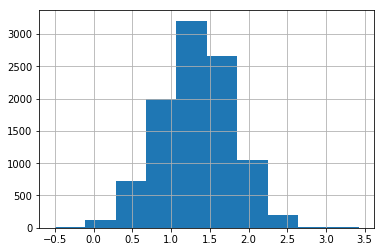

In [5]:
pd.Series(dist_dict).hist();

In [6]:
pdseries = pd.Series(dist_dict)
np.percentile(pdseries,0.5), np.percentile(pdseries,99.5)

(0.090277129296358255, 2.5164909371295865)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [8]:
dist_dict = []
for i in range(10000):
    resample = sample_data.sample(200, replace=True)
    older21 = resample.query('age==">=21"').height.mean()
    younger21 = resample.query('age=="<21"').height.mean()
    mean_diff = older21-younger21
    dist_dict.append(mean_diff)

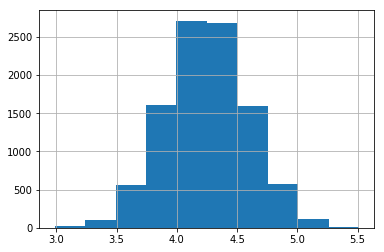

In [9]:
pd.Series(dist_dict).hist();

In [10]:
pdseries = pd.Series(dist_dict)
np.percentile(pdseries,0.5), np.percentile(pdseries,99.5)

(3.3667113781707676, 5.1321276562621989)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [11]:
dist_dict = []
for i in range(10000):
    resample = sample_data.sample(200, replace=True)
    under21 = resample.query('age=="<21"')
    coffee = under21.query('drinks_coffee==True').height.mean()
    no_coffee = under21.query('drinks_coffee==False').height.mean()
    mean_diff = coffee-no_coffee
    dist_dict.append(mean_diff)

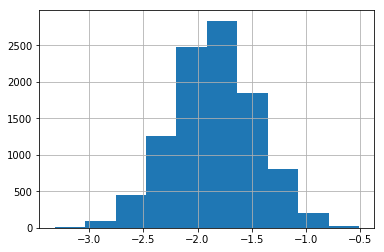

In [12]:
pd.Series(dist_dict).hist();

In [13]:
np.percentile(pd.Series(dist_dict),2.5), np.percentile(pd.Series(dist_dict), 97.5)

(-2.6258697660461601, -1.0809572510875134)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [14]:
dist_dict = []
for i in range(10000):
    resample = sample_data.sample(200, replace=True)
    over21 = resample.query('age==">=21"')
    coffee = over21.query('drinks_coffee==True').height.mean()
    no_coffee = over21.query('drinks_coffee==False').height.mean()
    mean_diff = coffee-no_coffee
    dist_dict.append(mean_diff)

In [15]:
s_convert = pd.Series(dist_dict)

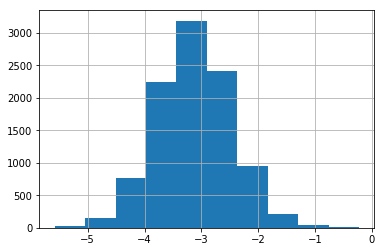

In [16]:
s_convert.hist();

In [17]:
np.percentile(s_convert,2.5),np.percentile(s_convert,97.5)

(-4.4080299424394704, -1.8281567318141774)